#Exploratory Analysis

In [774]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Load data

In [775]:
df = pd.read_csv('./../data/data.csv')

In [776]:
df.shape

(1494279, 23)

In [777]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494279 entries, 0 to 1494278
Data columns (total 23 columns):
Unnamed: 0      1494279 non-null int64
hash_t          1494279 non-null object
accountNonce    1494279 non-null int64
amount          1494279 non-null float64
block_id        1494279 non-null int64
gasLimit_t      1494279 non-null int64
gasUsed_t       1494279 non-null int64
isContractTx    0 non-null float64
newContract     1494279 non-null int64
price           1494279 non-null float64
time_t          1494279 non-null object
txIndex         515711 non-null float64
type            1494279 non-null object
blockTime       1494279 non-null int64
difficulty      1494279 non-null object
gasLimit_b      1494279 non-null float64
gasUsed_b       1494279 non-null float64
reward          1494279 non-null object
size            1494279 non-null int64
time_b          1494279 non-null object
totalFee        1494279 non-null object
tx_count        1494279 non-null int64
uncle_count     1

In [778]:
print('no txs: {}, no blocks: {}'.format(df.shape[0], np.unique(df['block_id'].values).shape[0]))

no txs: 1494279, no blocks: 14583


## Convert dates to datetime

In [779]:
df.loc[:,'time_t'] = pd.to_datetime(df.time_t, yearfirst=True)

In [780]:
df.loc[:,'time_b'] = pd.to_datetime(df.time_b, yearfirst=True)

In [781]:
df['time_t'].head()

0   2017-09-20 20:24:15
1   2017-09-20 20:24:15
2   2017-09-20 20:24:15
3   2017-09-20 20:24:15
4   2017-09-20 20:24:15
Name: time_t, dtype: datetime64[ns]

In [782]:
df.drop('Unnamed: 0', axis=1, inplace=True)

## Convert long integer columns
- difficulty
- reward
- totalFee

Filter each string extracting the digits

In [783]:
int(filter(str.isdigit, df['difficulty'][0]))

2338428842518947

In [784]:
df['difficulty'] = df['difficulty'].apply(lambda x: int(filter(str.isdigit, x)))

In [785]:
df['difficulty'].head()

0    2338428842518947
1    2338428842518947
2    2338428842518947
3    2338428842518947
4    2338428842518947
Name: difficulty, dtype: int64

In [786]:
df['reward'] = df['reward'].apply(lambda x: int(filter(str.isdigit, x)))

In [787]:
df['reward'].head()

0    5008232105000000000
1    5008232105000000000
2    5008232105000000000
3    5008232105000000000
4    5008232105000000000
Name: reward, dtype: int64

In [788]:
df['totalFee'] = df['totalFee'].apply(lambda x: int(filter(str.isdigit, x)))

In [789]:
df['totalFee'].head()

0    8232105000000000
1    8232105000000000
2    8232105000000000
3    8232105000000000
4    8232105000000000
Name: totalFee, dtype: int64

## Convert floats back to ints

In [790]:
def float_to_int(col_list):
    for col in col_list:
        df[col] = df[col].apply(lambda x: np.rint(x))
        df[col] = df[col].values.astype(int)

In [791]:
float_to_int(['amount', 'price', 'gasLimit_b', 'gasUsed_b'])

The column "isContractTx" is empty so drop it

In [792]:
df.drop('isContractTx', axis=1, inplace=True)

In [793]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494279 entries, 0 to 1494278
Data columns (total 21 columns):
hash_t          1494279 non-null object
accountNonce    1494279 non-null int64
amount          1494279 non-null int64
block_id        1494279 non-null int64
gasLimit_t      1494279 non-null int64
gasUsed_t       1494279 non-null int64
newContract     1494279 non-null int64
price           1494279 non-null int64
time_t          1494279 non-null datetime64[ns]
txIndex         515711 non-null float64
type            1494279 non-null object
blockTime       1494279 non-null int64
difficulty      1494279 non-null int64
gasLimit_b      1494279 non-null int64
gasUsed_b       1494279 non-null int64
reward          1494279 non-null int64
size            1494279 non-null int64
time_b          1494279 non-null datetime64[ns]
totalFee        1494279 non-null int64
tx_count        1494279 non-null int64
uncle_count     1494279 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(16

In [794]:
df['txIndex'].isnull().sum()

978568

In [795]:
df['txIndex'].value_counts()

1.0     176351
2.0      92812
3.0      53512
4.0      42831
5.0      39828
6.0      34256
7.0      32021
8.0      11919
9.0       5642
10.0      5096
11.0      4882
12.0      4867
13.0      4317
14.0      3138
15.0      1954
16.0      1823
17.0       289
18.0       154
19.0        12
20.0         7
Name: txIndex, dtype: int64

In [796]:
df['type'].value_counts()

tx         973640
call       492595
create      27726
suicide       318
Name: type, dtype: int64

In [797]:
df['newContract'].value_counts()

0    1489351
1       4928
Name: newContract, dtype: int64

Binarize the amount column (1 if > 0 and 0 if 0)

In [798]:
df['amount_binary'] = df['amount'].map(lambda x: 1 if x > 0 else 0)

## Check for NaN values

In [799]:
for col in df.columns:
    print(col, df[col].isnull().sum())

hash_t 0
accountNonce 0
amount 0
block_id 0
gasLimit_t 0
gasUsed_t 0
newContract 0
price 0
time_t 0
txIndex 978568
type 0
blockTime 0
difficulty 0
gasLimit_b 0
gasUsed_b 0
reward 0
size 0
time_b 0
totalFee 0
tx_count 0
uncle_count 0
amount_binary 0


#Columns

In [800]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494279 entries, 0 to 1494278
Data columns (total 22 columns):
hash_t           1494279 non-null object
accountNonce     1494279 non-null int64
amount           1494279 non-null int64
block_id         1494279 non-null int64
gasLimit_t       1494279 non-null int64
gasUsed_t        1494279 non-null int64
newContract      1494279 non-null int64
price            1494279 non-null int64
time_t           1494279 non-null datetime64[ns]
txIndex          515711 non-null float64
type             1494279 non-null object
blockTime        1494279 non-null int64
difficulty       1494279 non-null int64
gasLimit_b       1494279 non-null int64
gasUsed_b        1494279 non-null int64
reward           1494279 non-null int64
size             1494279 non-null int64
time_b           1494279 non-null datetime64[ns]
totalFee         1494279 non-null int64
tx_count         1494279 non-null int64
uncle_count      1494279 non-null int64
amount_binary    1494279 n

##Decription:
###Transaction level
- hash_t : a unique identifier for each transaction
- accountNonce : the number of transactions the sender account has made on the network (mechanism to ensure the same tranaction isn't submitted twice)
- amount : for monetary transactions, the amount in Ether that is exchanged
- block_id : a unique identifier for each block
- gasLimit_t : the maximum amount of gas that is allowed to be spent on gas for a given transaction
- gasUsed_t : the actual amount of gas that was consumed on the given transaction 
- newContract : whether it is a new contract or not
- price : the price per unit gas (Wei)
- txIndex : an integer from 1 to 20 (or NaN)
- amount_binary : binarized amount column (1 if amount is non-zero)
- type : the kind of transaction
    - tx
    - call
    - create
    - suicide

###Block level
- blockTime : the total amount of time spent on the block
- difficulty : 
- gasLimit_b :
- gasUsed_b :
- reward :
- size : 
- time_b :
- totalFee :
- tx_count : the total number of txs in a given block
- uncle_count : 

##Categorical variables:
- txIndex
- type
- amount_binary

#Explore features

##Price (dependent variable)

###Convert price from Wei to Gwei

In [801]:
df['price_gwei'] = df['price'].values / 1000000000

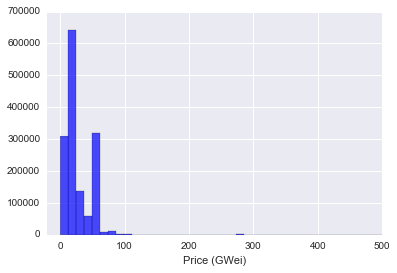

In [802]:
plt.hist(df['price_gwei'], bins=3000, color='b', alpha=0.7)
plt.xlim(-20,500)
plt.xlabel('Price (GWei)')
plt.show()

In [803]:
np.mean(df['price_gwei'].values)

29.105697635574437

In [804]:
np.max(df['price_gwei'].values)

37304.531999999999

In [805]:
np.min(df['price_gwei'].values)

1.0000000000000001e-09

Price ranges from 0 to 37304 GWei

In [806]:
df['amount_binary'].value_counts()

0    862496
1    631783
Name: amount_binary, dtype: int64

In [807]:
df['type'].value_counts()

tx         973640
call       492595
create      27726
suicide       318
Name: type, dtype: int64

In [808]:
grouped_type = df.groupby('type')

In [809]:
df.groupby('type')['price_gwei'].mean()

type
call       34.134513
create     11.723243
suicide     8.152529
tx         27.063300
Name: price_gwei, dtype: float64

Call has the highest mean price, while suicide has the lowest

###Plot price for different types

In [810]:
tx = df[df['type'] == 'tx']
call = df[df['type'] == 'call']
create = df[df['type'] == 'create']
suicide = df[df['type'] == 'suicide']

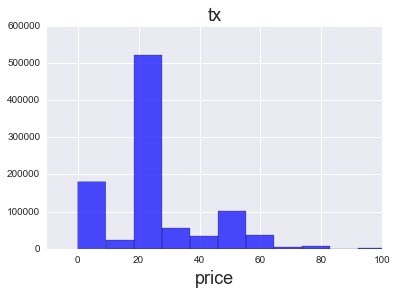

In [811]:
plt.hist(tx['price_gwei'], bins=4000, color='b', alpha=0.7)
plt.xlim(-10,100)
plt.title('tx', fontsize=18)
plt.xlabel('price', fontsize=18)
plt.show()

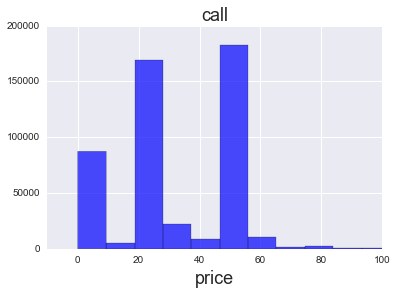

In [812]:
plt.hist(call['price_gwei'], bins=4000, color='b', alpha=0.7)
plt.xlim(-10,100)
plt.title('call', fontsize=18)
plt.xlabel('price', fontsize=18)
plt.show()

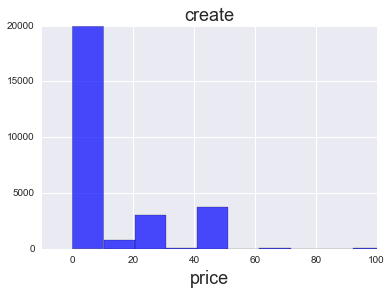

In [813]:
plt.hist(create['price_gwei'], bins=50, color='b', alpha=0.7)
plt.xlim(-10,100)
plt.title('create', fontsize=18)
plt.xlabel('price', fontsize=18)
plt.show()

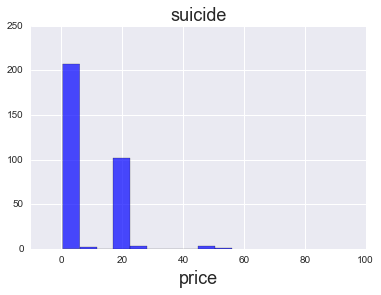

In [814]:
plt.hist(suicide['price_gwei'], bins=10, color='b', alpha=0.7)
plt.xlim(-10,100)
plt.title('suicide', fontsize=18)
plt.xlabel('price', fontsize=18)
plt.show()

There seems to be some signal among the different transaction types 

##Clean up time data

###new column for day, time

In [815]:
df['day'] = pd.DatetimeIndex(df['time_t']).day

In [816]:
df['day'].value_counts()

19    414215
18    298074
20    295637
21    171594
22    134105
23    124697
24     55957
Name: day, dtype: int64

In [817]:
df['hour'] = pd.DatetimeIndex(df['time_t']).hour

In [818]:
df['minute'] = pd.DatetimeIndex(df['time_t']).minute

In [819]:
df['second'] = pd.DatetimeIndex(df['time_t']).second

In [820]:
df['dayofweek'] = pd.DatetimeIndex(df['time_t']).dayofweek

In [821]:
df['dayofweek'].value_counts()

1    414215
0    298074
2    295637
3    171594
4    134105
5    124697
6     55957
Name: dayofweek, dtype: int64

In [822]:
df.columns

Index([u'hash_t', u'accountNonce', u'amount', u'block_id', u'gasLimit_t',
       u'gasUsed_t', u'newContract', u'price', u'time_t', u'txIndex', u'type',
       u'blockTime', u'difficulty', u'gasLimit_b', u'gasUsed_b', u'reward',
       u'size', u'time_b', u'totalFee', u'tx_count', u'uncle_count',
       u'amount_binary', u'price_gwei', u'day', u'hour', u'minute', u'second',
       u'dayofweek'],
      dtype='object')

In [823]:
#mean price per day
df['price_gwei'].groupby(df.day).mean()

day
18    27.951377
19    28.947561
20    36.006918
21    25.445163
22    25.895773
23    25.213314
24    27.555949
Name: price_gwei, dtype: float64

###How many blocks are in each day?

In [824]:
print('no blocks per day: {}'.format(np.unique(df[df['day'] == 19]['block_id'].values).shape[0]))

no blocks per day: 3559


In [825]:
ts = df.set_index(df['time_t'])

In [826]:
price = pd.Series(ts['price_gwei'])

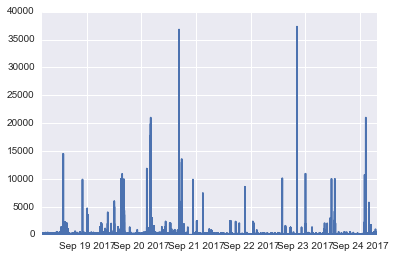

In [827]:
plt.plot(price)

In [828]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494279 entries, 0 to 1494278
Data columns (total 28 columns):
hash_t           1494279 non-null object
accountNonce     1494279 non-null int64
amount           1494279 non-null int64
block_id         1494279 non-null int64
gasLimit_t       1494279 non-null int64
gasUsed_t        1494279 non-null int64
newContract      1494279 non-null int64
price            1494279 non-null int64
time_t           1494279 non-null datetime64[ns]
txIndex          515711 non-null float64
type             1494279 non-null object
blockTime        1494279 non-null int64
difficulty       1494279 non-null int64
gasLimit_b       1494279 non-null int64
gasUsed_b        1494279 non-null int64
reward           1494279 non-null int64
size             1494279 non-null int64
time_b           1494279 non-null datetime64[ns]
totalFee         1494279 non-null int64
tx_count         1494279 non-null int64
uncle_count      1494279 non-null int64
amount_binary    1494279 n

In [829]:
np.max(df['amount'].values)

9223372036849999872

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x156bab950>]], dtype=object)

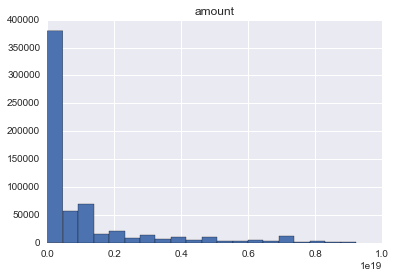

In [830]:
df[df['amount'] > 0].hist('amount', bins=20)

In [831]:
df[(df['amount'] > 2000000000000000000) & (df['amount'] < 3000000000000000000)].sort_values('time_t')

,hash_t,accountNonce,amount,block_id,gasLimit_t,gasUsed_t,newContract,price,time_t,txIndex,...,totalFee,tx_count,uncle_count,amount_binary,price_gwei,day,hour,minute,second,dayofweek
992252,0xdb9f9076d7403e7099ddc03100e7505e04ba2fa53271...,394330,2108035200000000000,4286251,90000,21000,0,50000000000,2017-09-18 04:16:31,NaN,...,302278670637532540,289,0,1,50.000000,18,4,16,31,0
992247,0xe0e0f58633c7dcf6c4242c25de6bacf40f5e44fb7c78...,32362,2027354350000000000,4286251,90000,21000,0,36000000000,2017-09-18 04:16:31,NaN,...,302278670637532540,289,0,1,36.000000,18,4,16,31,0
992259,0xd82df5082100d3a4a277223b799d943bc28b75f6209b...,394444,2982933310849999872,4286251,90000,21000,0,50000000000,2017-09-18 04:16:31,NaN,...,302278670637532540,289,0,1,50.000000,18,4,16,31,0
992436,0xa3359d9cf4d114208726bc3ec0f1d72ab1be3f25dab5...,394426,2792815008089999872,4286251,90000,21000,0,50000000000,2017-09-18 04:16:31,NaN,...,302278670637532540,289,0,1,50.000000,18,4,16,31,0
992428,0xaa00a2270ca5fb03071e0443d999f99358781d66ae29...,394405,2806420014449999872,4286251,90000,21000,0,50000000000,2017-09-18 04:16:31,NaN,...,302278670637532540,289,0,1,50.000000,18,4,16,31,0
992367,0x4cd3c70fa7527c45f6c3bdbc431f832f20ba2e66fac9...,205741,2443300000000000000,4286251,100000,21051,0,49500000000,2017-09-18 04:16:31,NaN,...,302278670637532540,289,0,1,49.500000,18,4,16,31,0
992358,0x54d7d4d1c6dac6b673edd4f9ed600cb6b0a4858b42b2...,394308,2548942061740000256,4286251,90000,21000,0,50000000000,2017-09-18 04:16:31,NaN,...,302278670637532540,289,0,1,50.000000,18,4,16,31,0
992321,0x6bd519a5984e4da4346bff65a1d4db04e71491046e80...,394392,2717699599489999872,4286251,90000,21000,0,50000000000,2017-09-18 04:16:31,NaN,...,302278670637532540,289,0,1,50.000000,18,4,16,31,0
992291,0x81cc47ad7e68f6cfde1bfe7386bae3d38dfbee786d84...,394377,2430664247160000000,4286251,90000,21000,0,50000000000,2017-09-18 04:16:31,NaN,...,302278670637532540,289,0,1,50.000000,18,4,16,31,0
992194,0x298e0fbed4ef8e9242e1cb436c8508d7e94883588068...,31063,2181552150000000000,4286252,90000,21000,0,30000000000,2017-09-18 04:17:20,NaN,...,235138217876085000,239,0,1,30.000000,18,4,17,20,0


(0, 100)

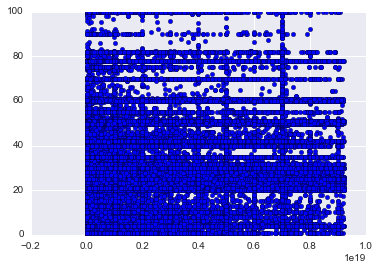

In [832]:
plt.scatter(df['amount'][df['amount'] > 0], df['price_gwei'][df['amount'] > 0])
plt.ylim(0,100)

#Conversions

### Conversion from Gwei to ETH
1 Gwei = 0.000000001 ETH

### Amount 
- amount is ~ to 10^-18 ETH

###Convert amount to ETH

In [833]:
df['amount_eth'] = df['amount'].map(lambda x: float(x) / 1000000000000000000)

In [834]:
df['amount_eth'].head()

0    0.499093
1    0.149222
2    0.099608
3    0.199005
4    1.000289
Name: amount_eth, dtype: float64

In [835]:
df[['amount_eth', 'type', 'newContract', 'price_gwei', 'block_id']].head()

,amount_eth,type,newContract,price_gwei,block_id
0,0.499093,tx,0,21.0,4295887
1,0.149222,call,0,21.0,4295887
2,0.099608,tx,0,21.0,4295887
3,0.199005,tx,0,21.0,4295887
4,1.000289,tx,0,21.0,4295887


In [836]:
df['newContract'].value_counts()

0    1489351
1       4928
Name: newContract, dtype: int64

In [837]:
df['newContract'].isnull().sum()

0

In [838]:
df['price_gwei'].describe()

count    1.494279e+06
mean     2.910570e+01
std      1.341286e+02
min      1.000000e-09
25%      2.000000e+01
50%      2.100000e+01
75%      4.200000e+01
max      3.730453e+04
Name: price_gwei, dtype: float64

##Encode the type column

In [839]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['type_enc'] = le.fit_transform(df['type'])

In [840]:
df['type_enc'].value_counts()

3    973640
0    492595
1     27726
2       318
Name: type_enc, dtype: int64

#Filter data 
- only monetary transactions (amount > 0)
- only gas price > 0

In [841]:
df_filtered = df[(df['amount_eth'] > 0) & (df['price_gwei'] > 0)]

In [842]:
print('deleted {} rows having 0 amounts'.format(df[df['amount_eth'] == 0].values.shape[0]))

deleted 747566 rows having 0 amounts


In [843]:
print('deleted {} rows having 0 gas price'.format(df[df['price_gwei'] == 0].values.shape[0]))

deleted 0 rows having 0 gas price


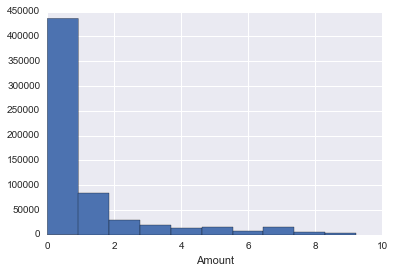

In [844]:
df_filtered['amount_eth'].hist()
plt.xlabel('Amount')

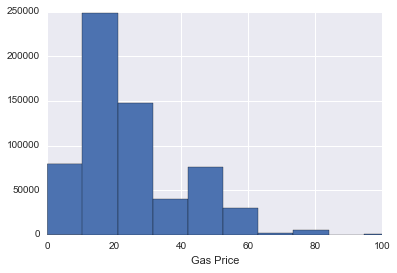

In [845]:
df_filtered['price_gwei'].hist(bins=2000)
plt.xlim(0,100)
plt.xlabel('Gas Price')

In [846]:
gas_log = np.log(df_filtered['price_gwei'].values)

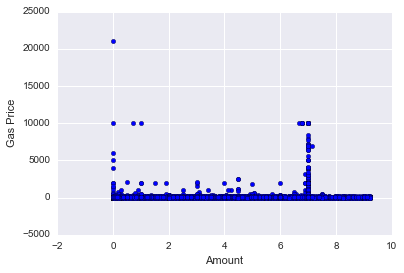

In [847]:
plt.scatter(df_filtered['amount_eth'], df_filtered['price_gwei'])
plt.xlabel('Amount')
plt.ylabel('Gas Price')

In [848]:
df['dayofweek'].describe()

count    1.494279e+06
mean     2.018310e+00
std      1.702585e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      6.000000e+00
Name: dayofweek, dtype: float64

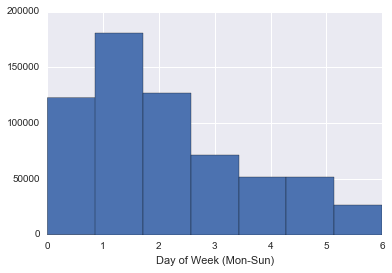

In [849]:
df_filtered['dayofweek'].hist(bins=7)
plt.xlabel("Day of Week (Mon-Sun)")

In [850]:
df_filtered['hour'].describe()

count    631783.000000
mean         10.468607
std           6.591704
min           0.000000
25%           4.000000
50%          10.000000
75%          16.000000
max          23.000000
Name: hour, dtype: float64

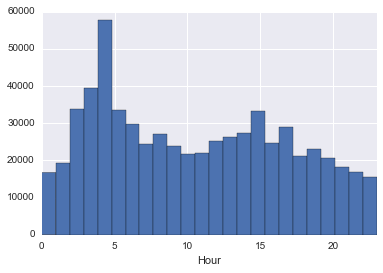

In [851]:
df_filtered['hour'].hist(bins=24)
plt.xlim(0,23)
plt.xlabel('Hour')

In [852]:
df_filtered.groupby('type')['gasUsed_t'].mean()

type
call         2995.598818
create     340235.204340
suicide         0.000000
tx          29458.468473
Name: gasUsed_t, dtype: float64

#Obtain averages over previous blocks for each block id to generate new features
- difficulty 
- blocktime
- transactions/second
- uncle rate
- gasused by transaction
- gasused by block
- gasprice

In [853]:
print('No blocks: {}'.format(np.unique(df_filtered['block_id'].values).shape[0]))

No blocks: 14473


### Add column with txs per second for each block

In [854]:
df_filtered['txcnt_second'] = df_filtered['tx_count'].values / df_filtered['blockTime'].values

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [855]:
block_0.shape

(19, 30)

### Add column with avg gasUsed and avg price per transaction for each block

In [856]:
df_filtered['avg_gasUsed_t_perblock'] = df_filtered.groupby('block_id')['gasUsed_t'].transform('mean')

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [857]:
df_filtered['avg_price_perblock'] = df_filtered.groupby('block_id')['price_gwei'].transform('mean')

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [858]:
df_filtered.to_csv('./../data/data_filtered.csv')

### Calculate the rolling average over given number of windows

In [859]:
def rolling_avg(window_size):
    
    price = df_filtered[['block_id', 'avg_price_perblock']].drop_duplicates().sort_values('block_id', 
                                                                                 ascending=True)
    gasUsed_t = df_filtered[['block_id', 'avg_gasUsed_t_perblock']].drop_duplicates().sort_values('block_id', 
                                                                                         ascending=True)
    txcnt_second = df_filtered[['block_id', 'txcnt_second']].drop_duplicates().sort_values('block_id',
                                                                                     ascending=True)
    tx_count = df_filtered[['block_id', 'tx_count']].drop_duplicates().sort_values('block_id',
                                                                                     ascending=True)
    gasUsed_b = df_filtered[['block_id', 'gasUsed_b']].drop_duplicates().sort_values('block_id',
                                                                                     ascending=True)
    uncle_count = df_filtered[['block_id', 'uncle_count']].drop_duplicates().sort_values('block_id', 
                                                                                         ascending=True)
    difficulty = df_filtered[['block_id', 'difficulty']].drop_duplicates().sort_values('block_id', 
                                                                                       ascending=True)
    blocktime = df_filtered[['block_id', 'blockTime']].drop_duplicates().sort_values('block_id', 
                                                                                     ascending=True)
    # create new pandas dataframe with average values
    rolling_avg = pd.DataFrame()
    
    # calculate rolling averages 
    rolling_avg['avg_blocktime'] = blocktime['blockTime'].rolling(window=window_size).mean()
    rolling_avg['avg_gasUsed_b'] = gasUsed_b['gasUsed_b'].rolling(window=window_size).mean()
    rolling_avg['avg_tx_count'] = tx_count['tx_count'].rolling(window=window_size).mean()
    rolling_avg['avg_uncle_count'] = uncle_count['uncle_count'].rolling(window=window_size).mean()
    rolling_avg['avg_difficulty'] = difficulty['difficulty'].rolling(window=window_size).mean()
    rolling_avg['avg_txcnt_second'] = txcnt_second['txcnt_second'].rolling(window=window_size).mean()
    rolling_avg['avg_gasUsed_t'] = gasUsed_t['avg_gasUsed_t_perblock'].rolling(window=window_size).mean()
    rolling_avg['avg_price'] = price['avg_price_perblock'].rolling(window=window_size).mean()
    
    # insert blockids to merge on
    rolling_avg['blockids'] = df_filtered['block_id'].drop_duplicates().sort_values(ascending=True)
    
    return rolling_avg

There are between 1400 and 3500 blocks in a given day

###Create csv files for each regime

In [860]:
num_blocks = [5, 10, 25, 50, 100, 1000, 2000, 3000, 4000]
for num in num_blocks:
    df_rolling_avg = rolling_avg(num)
    df_rolling_avg.to_csv('./../data/block_avg_{}.csv'.format(num))